Libraries Set-Up & Data Import

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [397]:
data = pd.read_csv("Loan-Approval-Prediction.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Data Exploration

In [398]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Outliers Identification & Corrective Steps

<Axes: >

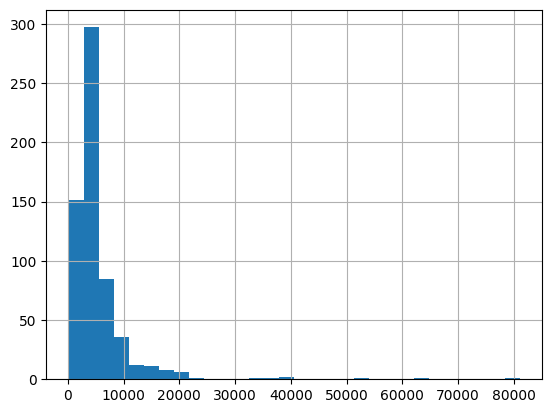

In [400]:
#data['LoanAmount'].hist(bins=30)
#data['Loan_Amount_Term'].hist(bins=30)
data['ApplicantIncome'].hist(bins=30)
#data['CoapplicantIncome'].hist(bins=30)

<Axes: title={'center': 'LoanAmount'}, xlabel='Loan_Status'>

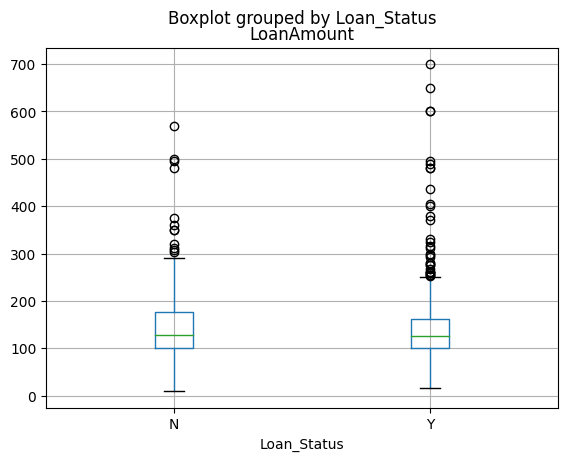

In [401]:
#data.boxplot(column='ApplicantIncome',by='Education')
#data.boxplot(column='ApplicantIncome',by='Property')
#data.boxplot(column='LoanAmount',by='Loan_Amount_Term')
#data.boxplot(column='LoanAmount',by='Self_Employed')
data.boxplot(column='LoanAmount',by='Loan_Status')

<Axes: >

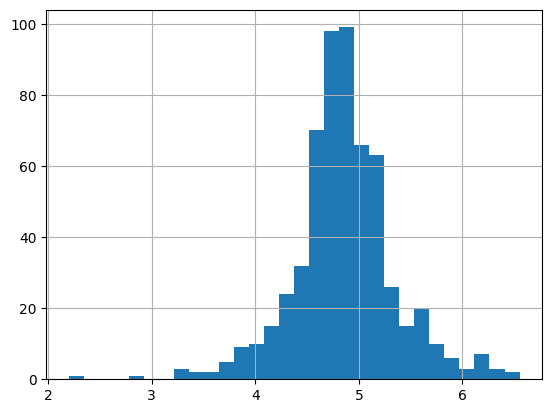

In [402]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=30)

<Axes: >

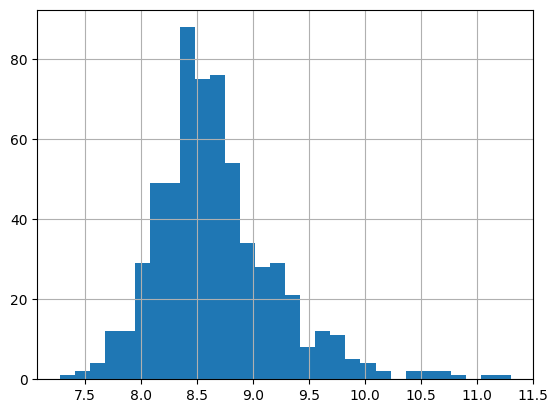

In [403]:
data['TotalIncome']=data['ApplicantIncome'] + data['CoapplicantIncome']
data['Total_log']=np.log(data['TotalIncome'])
data['Total_log'].hist(bins=30)

In [404]:
data.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

HandlingMissing Values

In [405]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
Total_log             0
dtype: int64

In [406]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)
data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean(),inplace=True)

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [407]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
Total_log            0
dtype: int64

In [408]:
data.drop('Loan_ID', axis=1, inplace=True)

Label Encoding - To make the data more understandable for machine

In [409]:
label_encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

In [410]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,Total_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


Spliting the data into Train & Test Datasets

In [411]:
x = data.drop(['Gender','Dependents','TotalIncome','CoapplicantIncome','LoanAmount','Loan_Status'], axis=1)
y = data['Loan_Status']

In [412]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=99)

First Model - Decision Tree

In [413]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)
y_preds=dtc.predict(x_test)

In [414]:
from sklearn import metrics
print("DTC Accuracy = ",(metrics.accuracy_score(y_preds,y_test)*100))

DTC Accuracy =  77.41935483870968


Second Model - Naive Bayes

In [415]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train,y_train)

y_preds = nbc.predict(x_test)

In [416]:
print("NBC Accuracy = ",(metrics.accuracy_score(y_preds,y_test)*100))

NBC Accuracy =  82.25806451612904


Third Model - Linear Regression

In [417]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = nbc.predict(x_test)

In [418]:
print("LR Accuracy = ",(metrics.accuracy_score(y_preds,y_test)*100))

LR Accuracy =  82.25806451612904


Conclusion

In [ ]:
The Models performing well are 